# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [37]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user
!pip install statsmodels

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [3]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [38]:
df.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
df.shape

(100, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [9]:
def categorical_summary(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    summary = {}
    for column in categorical_columns:
        counts = df[column].value_counts()
        percentages = df[column].value_counts(normalize=True) * 100
        summary[column] = pd.DataFrame({'Counts': counts, 'Percentage': percentages})
    return summary

In [10]:
summary_statistics = categorical_summary(df)

In [11]:
for column, summary_df in summary_statistics.items():
    print(f'Statistical Summary for {column}:')
    print(summary_df)
    print()

Statistical Summary for group:
           Counts  Percentage
control        50        50.0
treatment      50        50.0

Statistical Summary for landing_page:
     Counts  Percentage
old      50        50.0
new      50        50.0

Statistical Summary for converted:
     Counts  Percentage
yes      54        54.0
no       46        46.0

Statistical Summary for language_preferred:
         Counts  Percentage
Spanish      34        34.0
French       34        34.0
English      32        32.0



In [12]:
print(df.isnull().sum())

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


In [13]:
print(df['group'].nunique())
df['group'].unique()

2


array(['control', 'treatment'], dtype=object)

In [14]:
print(df['landing_page'].nunique())
df['landing_page'].unique()

2


array(['old', 'new'], dtype=object)

In [15]:
print(df['time_spent_on_the_page'].nunique())

94


In [16]:
df['user_id'].nunique()

100

In [17]:
print(df['converted'].nunique())
df['converted'].unique()

2


array(['no', 'yes'], dtype=object)

In [18]:
print(df['language_preferred'].nunique())
df['language_preferred'].unique()

3


array(['Spanish', 'English', 'French'], dtype=object)

### Univariate Analysis

In [19]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

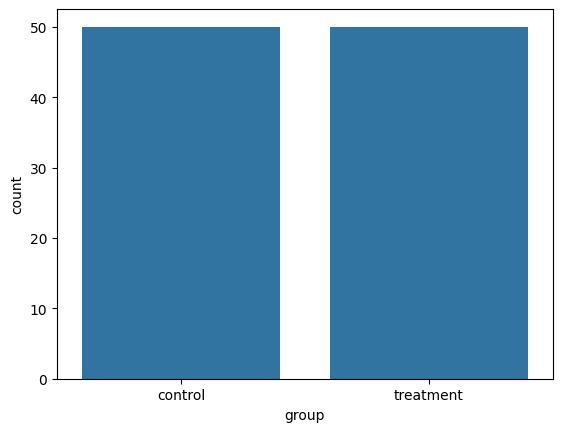

In [20]:
sns.countplot(data=df,x='group')
plt.show()

In [21]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

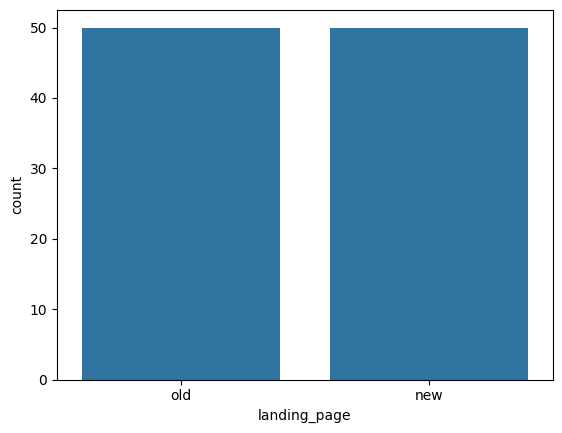

In [22]:
sns.countplot(data=df,x='landing_page')
plt.show()

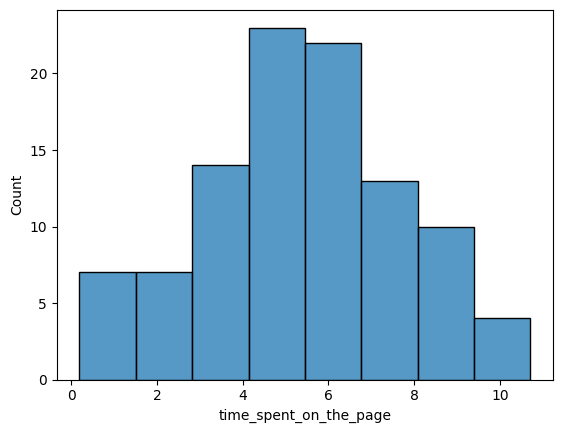

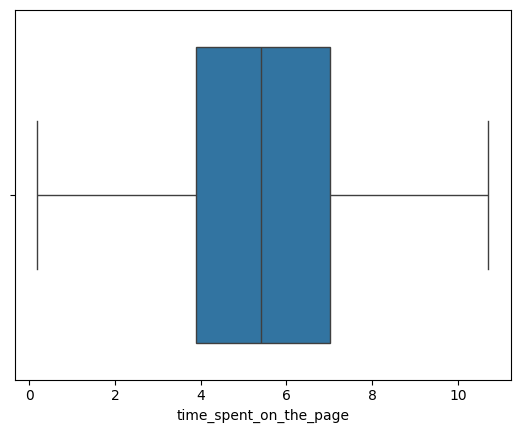

In [23]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

In [24]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

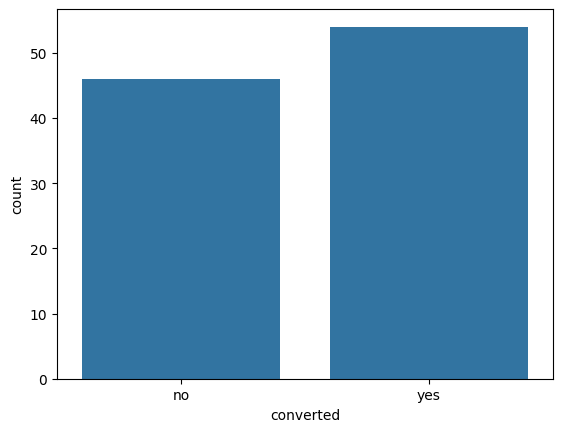

In [25]:
sns.countplot(data=df,x='converted')
plt.show()

In [26]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

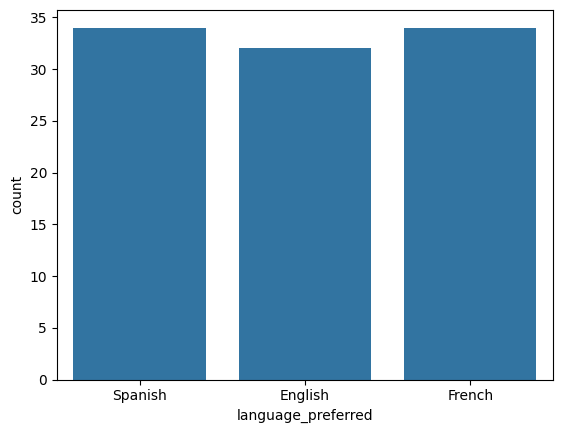

In [27]:
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

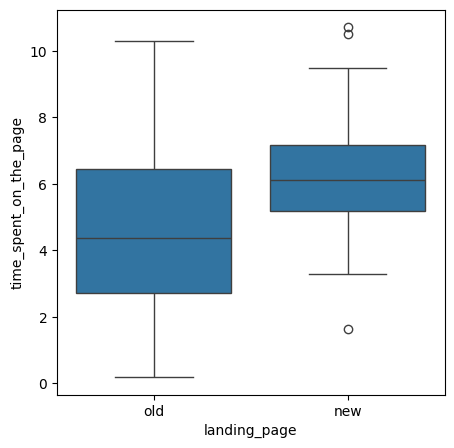

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

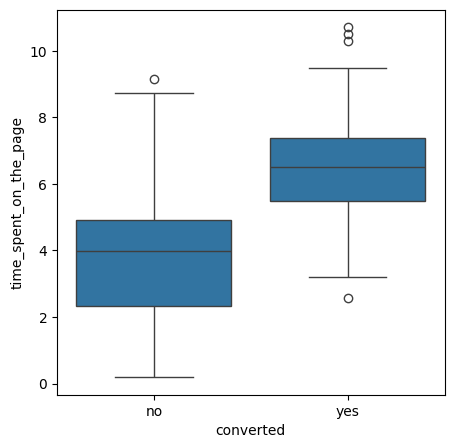

In [29]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x ='converted', y='time_spent_on_the_page')
plt.show()

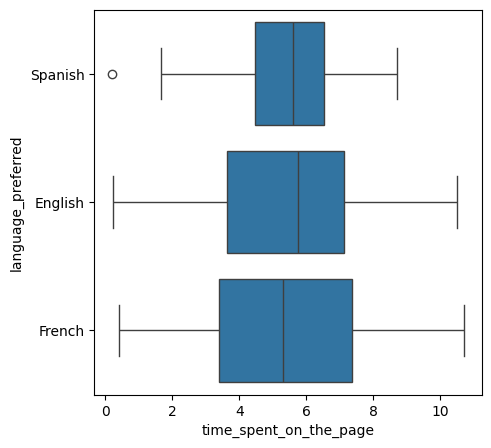

In [30]:
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

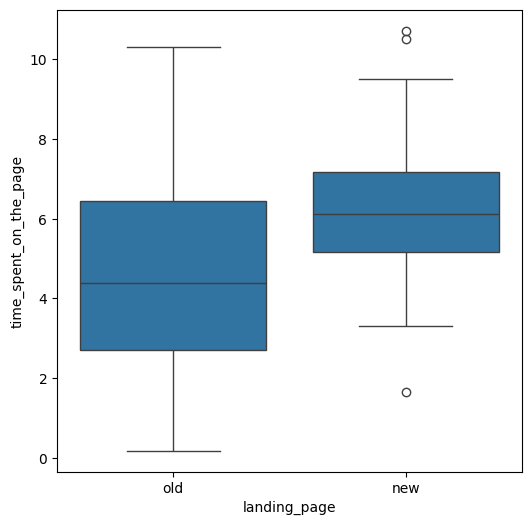

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x ='landing_page', y ='time_spent_on_the_page', data = df)
plt.show()

From the above visual analysis we can see that time spent on new page is higher than that of old page.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

𝐻0: The mean time spent on new page is equal to that of the old page. 𝐻𝑎: The mean time spent on the new page is greater than that of the old page.

Let 𝜇1 and 𝜇2 be the mean time spent on the new page and the mean time spent on the old page respectively.

Mathematically, the above formulated hypotheses can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1>𝜇2

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. we choose Independent samples t-test

### Step 3: Decide the significance level

As given in the problem statement, we select α=0.05

### Step 4: Collect and prepare data

In [32]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 

In [36]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [34]:
from scipy.stats import ttest_ind
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False , alternative = 'greater') 
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [35]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the mean time spent on new page is greater than that from the old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

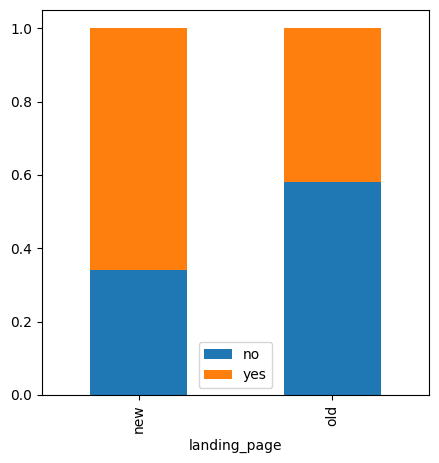

In [39]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(5,5),stacked=True)
plt.legend()
plt.show()

Though we can see from above analysis that the conversion of new page is higher than old page, we are going to perform the required test for a precise conclusion.

Defining the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

𝐻0: The mean conversion of the new page is equal to that of the old page. 𝐻𝑎: The mean conversion of the new page is greater than that of the old page.

Let 𝜇1 and 𝜇2 be the mean conversion of the new page and the mean conversion of the old page respectively.

Mathematically, the above formulated hypotheses can be written as:

𝐻0:𝜇1=𝜇2

𝐻𝑎:𝜇1>𝜇2

This is a one-tailed test concerning two population proportions from two independent populations. Z-test for two population proportions

As given in the problem statement, we select α = 0.05

In [40]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 
n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [41]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   #complete the code by filling appropriate parameters in the blanks
print('The p-value is', p_value)

The p-value is 0.008026308204056278


In [42]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the mean conversion of the new page is greater than that of the old page.

## 3. Is the conversion and preferred language are independent or related?

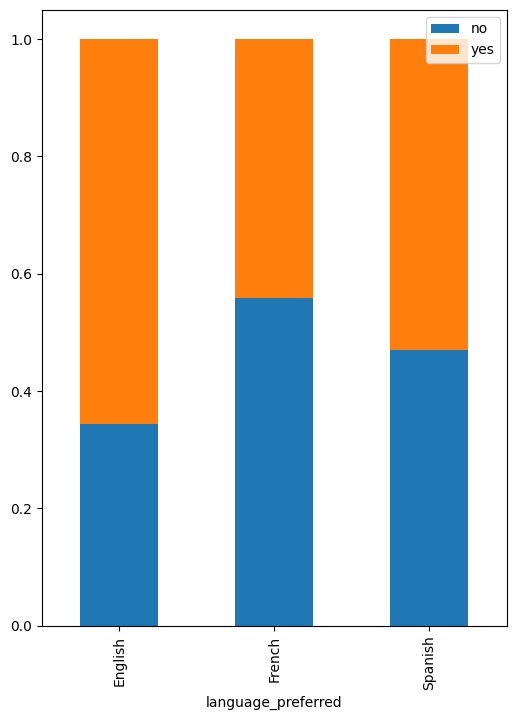

In [43]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

We can observe as the visual data implies that the conversion rate might indeed be influenced by the preferred language of the respondents. 

The null and alternative hypotheses can be formulated as:

H0: The preferred language is independent of the conversion status. This means that the language preference does not affect whether a page is converted.
Mathematically, it can be expressed as:
H0:𝜇1=𝜇2=𝜇3

H1: The preferred language is not independent of the conversion status. This suggests that the language preference does have an effect on the conversion status.
Mathematically, it can be stated as:
H1:𝜇1=!𝜇2=!𝜇3

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. We choose chi-square test for independence

As given in the problem statement, we select α = 0.05.

In [44]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [45]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks
print('The p-value is', p_value)

The p-value is 0.2129888748754345


In [46]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


At 5% significance level, we fail to reject the null hypothesis. Hence we do not have enough statistical evidence to say that the language preference does not affect whether a page is converted.

## 4. Is the time spent on the new page same for the different language users?

In [47]:
df_new = df[df['landing_page'] == 'new']

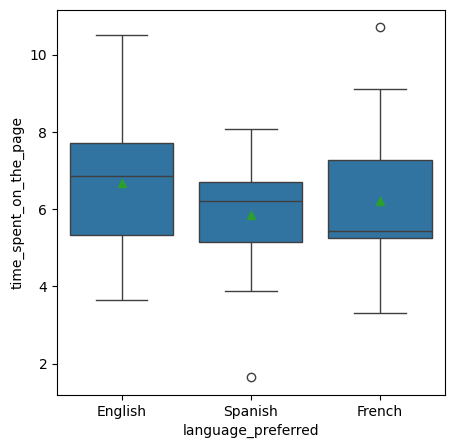

In [48]:
plt.figure(figsize=(5,5))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', showmeans=True, data=df_new)
plt.show()

Based on the mean time spent on the new page for different language users, we can define the null and alternative hypotheses for a statistical test as follows:

Null Hypothesis (H0): The mean time spent on the new page is the same across all language preferences. This can be mathematically expressed as: H0:μ1​=μ2​=μ3​

Alternative Hypothesis (H1): At least one group’s mean time spent on the new page is different from the others. Mathematically, this is expressed as: H1:Not all μ are equal

This is a problem, concerning three population means. We choose ANOVA test
As given in the problem statement, we select α = 0.05.

In [49]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'] 

In [50]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [51]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


At 5% significance level, we fail to reject the null hypothesis. Hence we do not have enough statistical evidence to say that the language preference affect time spent on the page.

## Conclusion and Business Recommendations

* Overall, the average time spent on a page both new and old is 5.37min. 

* It was observed that old pages are coverted more compared to new pages.

* Based on the sample data, although it seems that the languages preferred are French and Spanish we don't have enough statistical evidence to conclude that the time spent on the pages is due to the preferred language.

* Also we do not have enough statistical evidence to say that the language preference affected the page conversion. 

* From the above analysis we are sure that the time spent on new pages is more than that of old pages.


___